In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [42]:
apple_stock = pd.read_csv('apple_stock.csv', index_col='Date')
apple_stock.index = pd.to_datetime(apple_stock.index)
apple_stock.head() 


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


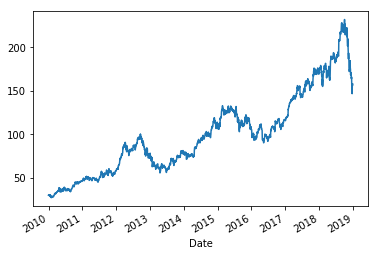

In [43]:
apple_stock["Close"].plot()

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(apple_stock.Close, model='multiplicative',freq  = 60 )

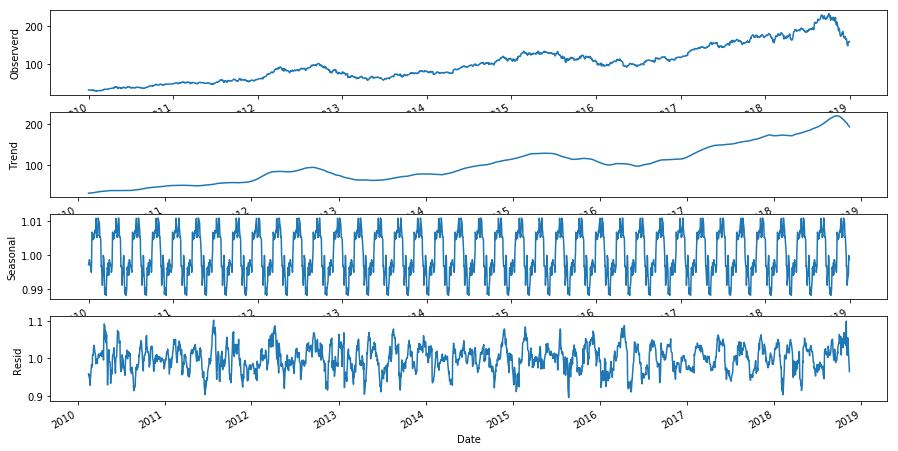

In [45]:
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observerd')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')
    
plot_decompose(result)

In [40]:
a = np.array( apple_stock.Close )  #before_normalization
a = a.reshape(-1,1)

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()   

after_Normalization = scaler.fit_transform(a) #after_Normalization 
print( a , after_Normalization )


# reverseData = scaler.inverse_transform(  after_Normalization )
# print( reverseData )

[[ 30.10428619]
 [ 30.5728569 ]
 [ 30.62571335]
 ...
 [156.1499939 ]
 [156.22999573]
 [157.74000549]] [[0.01304069]
 [0.01533048]
 [0.01558878]
 ...
 [0.62899662]
 [0.62938757]
 [0.63676664]]


In [39]:
after_Normalization = after_Normalization.reshape(-1,5,1)
print(after_Normalization.shape) 

(453, 5, 1)


In [40]:
X_train = after_Normalization[:, 0:4 ,0]  
X_train = X_train.reshape(-1,4,1)
Y_train = after_Normalization[:, 4, 0]
Y_train = Y_train.reshape(-1,1)

print(X_train.shape)  
print(Y_train.shape) 

(453, 4, 1)
(453, 1)


In [97]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, LSTM

def make_model() :
    model = Sequential()
    model.add(LSTM(2,activation="tanh" ,input_shape=(4, 1)))
    model.add(Dense(1))       
    model.compile(loss='mse', optimizer='sgd')
    model.summary()
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2)                 32        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
Train on 362 samples, validate on 91 samples
Epoch 1/500
362/362 [==============================] - 2s 4ms/step - loss: 0.0795 - val_loss: 0.4788
Epoch 2/500
362/362 [==============================] - 0s 193us/step - loss: 0.0457 - val_loss: 0.3886
Epoch 3/500
362/362 [==============================] - 0s 174us/step - loss: 0.0317 - val_loss: 0.3381
Epoch 4/500
362/362 [==============================] - 0s 174us/step - loss: 0.0265 - val_loss: 0.3047
Epoch 5/500
362/362 [==============================] - 0s 171us/step - loss: 0.0240 - v

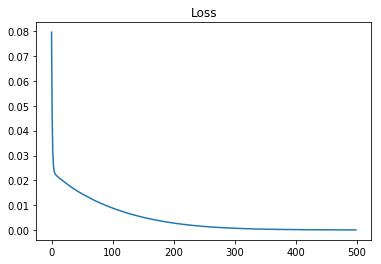

In [98]:
model = make_model() 
history = model.fit(X_train, Y_train, epochs=500 , validation_split =0.2, verbose=1)

# 학습 후 loss
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

In [99]:
y_predict = model.predict( after_Normalization[0, 0:4, 0].reshape(-1,4,1))
print(y_predict,   after_Normalization[0 , 4, 0 ])

reverseData = scaler.inverse_transform(   after_Normalization[0 , 4, 0 ].reshape(-1,1) )
y_predict = scaler.inverse_transform(   y_predict )
print( y_predict, reverseData )

[[0.01638936]] 0.01293596677571468
[[30.78954]] [[30.08285713]]
